In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
class muon_distribution:
    
    # a*math.exp(-(x-mean)/(2*c*c))
    def __init__(self, lifetime):
        self.lifetime = lifetime
        
    def evaluate_md(self,t):
        return (1/self.lifetime)*math.exp(-t/self.lifetime)
    
    def maximum(self):
        return 1.0
        
    def random_val(self):        
        x1 = 0 
        y1 = 0
        y2 = 1
        
        while ( y2 > y1 ):
            x1 = np.random.uniform() 
            x1 = x1*self.lifetime*5.
            y1 = self.evaluate_md(x1)
            y2 = np.random.uniform() * self.maximum()

        return x1
    
    def numeric_integral(self,lo,hi,npoints=100000):
        
        sumf = 0
        
        for i in range(0,npoints):
            x = lo+np.random.uniform()*(hi-lo)
            sumf += self.evaluate_md(x)
            
        return sumf*(hi-lo)/npoints
    
    def analytic_integral(self):
        return self.width*math.sqrt(2*math.pi)

In [77]:
test = muon_distribution(2.2)

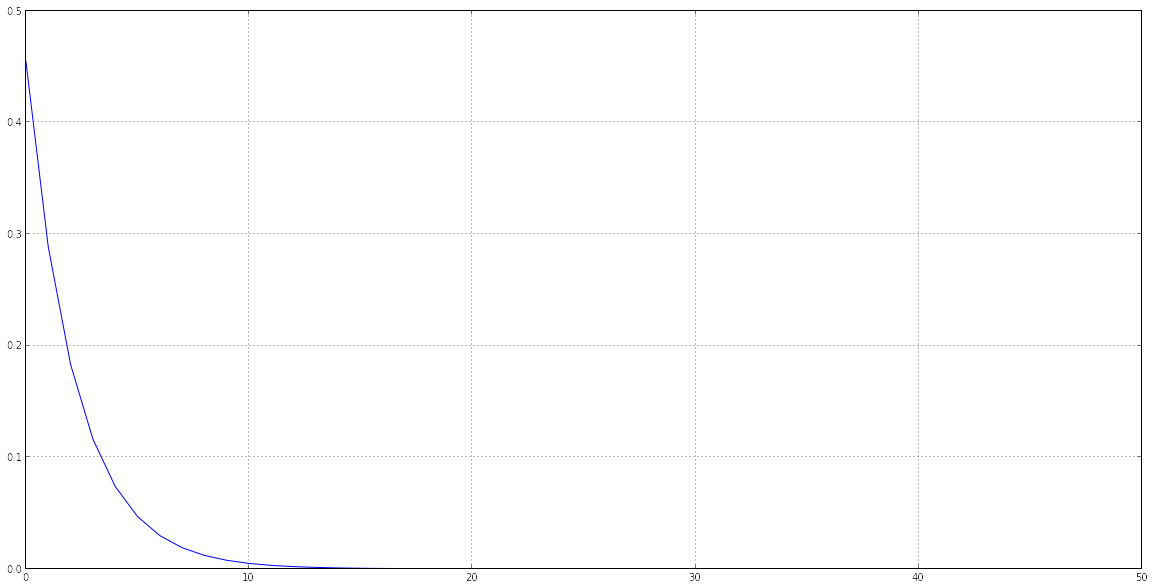

In [83]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot([x for x in range(0,50)],[test.evaluate_md(x) for x in range(0,50)],'-')

In [68]:
results = []
for i in range(0,100000):
    results.append(test.random_val())   

In [69]:
n, bins = np.histogram(results, bins=30, normed=True)

(0, 20)

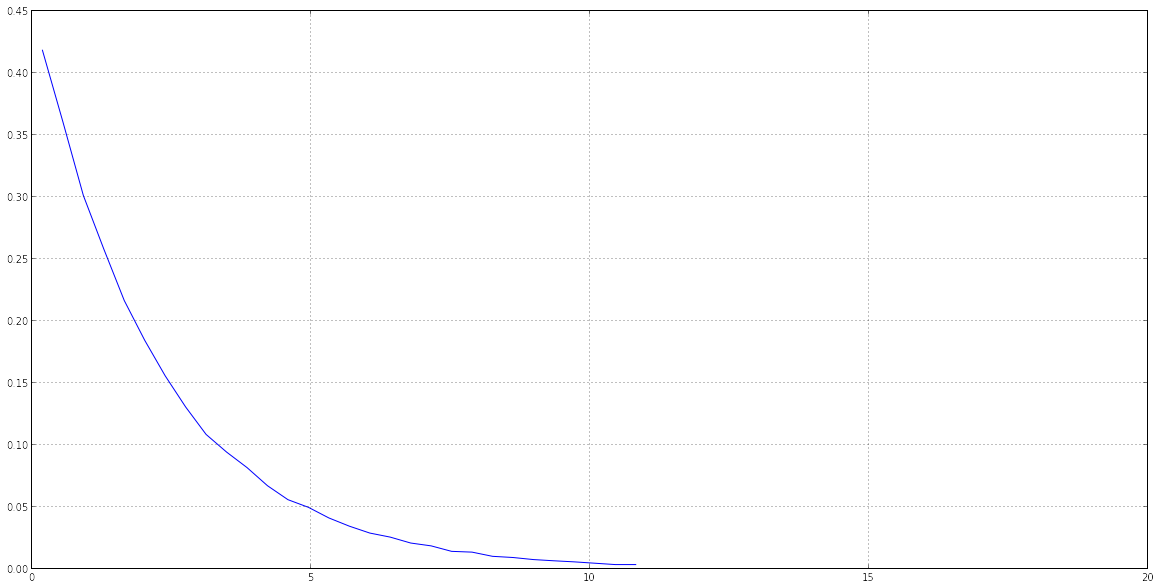

In [70]:
plt.figure(figsize=(20,10))
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n)
plt.grid(True)
plt.xlim(0,20)

In [86]:
1/test.evaluate_md(0)

2.2

2.2078615132185062